# Ch.02 The mathematical building blocks of neural networks

이 장에서는 다음 내용을 다룹니다.

* 신경망의 첫 번째 예시
* 텐서와 텐서 연산
* 역전파와 경사 하강법을 통한 신경망의 학습 방식
---

* 딥러닝 이해를 위해 **텐서, 텐서 연산, 미분, 경사 하강법** 등의 수학적 기초가 필요합니다.
* 복잡한 수식보다는 **직관적인 이해**와 **실행 가능한 코드를 통해 명확한 개념을 잡는 데 집중**합니다.
* 이러한 수학적 원리를 파악함으로써, 향후 실전 딥러닝 프레임워크를 학습할 수 있는 기반을 마련합니다.


**이 책의 코드 실행하기**

* 이 책은 실질적인 학습을 위해 Jupyter Notebook 기반의 실행 가능한 파이썬 코드를 제공합니다.
* 딥러닝 환경 설정의 가장 쉬운 방법은 무료 GPU를 지원하는 업계 표준인 Google Colab을 활용하는 것입니다.
* 사용자의 컴퓨터에서 로컬로 실행할 수도 있으며, 고사양 모델 학습 시에는 GPU 사용이 권장됩니다.
* 로컬 및 Colab에서 실행하는 방법과 코드는 https://github.com/fchollet/deep-learning-with-python-notebooks 에서 확인하실 수 있습니다.

## A first look at a neural network

* 딥러닝의 입문 과정으로 Keras 라이브러리를 사용해 MNIST 손글씨 숫자(28x28 픽셀)를 분류하는 예제를 다룹니다.
* MNIST는 6만 개의 훈련 이미지와 1만 개의 테스트 이미지로 구성된 데이터셋으로, 딥러닝의 성능을 검증하는 표준적인 기초 예제입니다.
* Keras는 복잡한 구현보다 핵심 개념에 집중할 수 있게 돕는 고수준 라이브러리이며, 예제의 세부 사항은 이후 단계별로 상세히 설명됩니다.
* 머신러닝에서 분류 항목은 **클래스**, 데이터 단위는 **샘플**, 각 샘플의 정답은 **레이블**이라고 정의합니다.

<img src="https://deeplearningwithpython.io/images/ch02/MNIST-sample-digits.3d651e1d.png" width="300"><p style="text-align:center">Figure 2.1 MNIST sample digits</p>

MNIST 데이터셋은 Keras에 4개의 NumPy 배열 형태로 미리 로드되어 있습니다.

**Loading the MNIST dataset in Keras**

In [15]:
from keras.datasets import mnist

(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

`train_images`와 `train_labels`는 모델이 학습할 데이터인 훈련 세트를 구성합니다. 모델은 학습된 데이터를 사용하여 테스트 세트인 `test_images`와 `test_labels`로 테스트됩니다. 이미지는 NumPy 배열로 인코딩되어 있으며, 레이블은 0부터 9까지의 숫자로 이루어진 배열입니다. 이미지와 레이블은 일대일로 대응합니다.

NumPy는 수치 계산을 위한 매우 인기 있는 Python 라이브러리입니다. 머신 러닝을 배우는 과정에서 자주 접하게 될 것입니다. GPU 및 자동 미분 지원이 부족하여 최신 머신 러닝 알고리즘을 구현하는 데는 잘 사용되지 않지만, NumPy 배열은 MNIST 숫자와 레이블처럼 수치 데이터 교환 형식으로 자주 사용됩니다.

이제 훈련 데이터를 살펴보겠습니다.

In [17]:
train_images.shape

(60000, 28, 28)

In [18]:
len(train_labels)

60000

In [19]:
train_labels

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [20]:
test_images.shape

(10000, 28, 28)

In [21]:
len(test_labels)

10000

In [22]:
test_labels

array([7, 2, 1, ..., 4, 5, 6], dtype=uint8)

워크플로는 다음과 같습니다. 
* 신경망에 훈련 데이터인 train_images와 train_labels를 입력합니다. 그러면 신경망은 이미지와 레이블을 연결하는 방법을 학습합니다.
* 마지막으로, 신경망에게 test_images에 대한 예측을 생성하도록 요청하고, 이 예측이 test_labels의 레이블과 일치하는지 확인합니다.

이제 신경망을 구축해 보겠습니다. 다시 한번 말씀드리지만, 이 예제의 모든 내용을 아직 이해할 필요는 없습니다.

In [14]:
import keras
from keras import layers

model = keras.Sequential(
    [
        layers.Dense(512, activation="relu"),
        layers.Dense(10, activation="softmax"),
    ]
)

신경망의 핵심 구성 요소는 레이어입니다. 레이어는 데이터를 걸러내는 필터라고 생각할 수 있습니다. 일부 데이터가 입력되면 더 유용한 형태로 출력됩니다. 구체적으로, 레이어는 입력된 데이터에서 표현을 추출하는데, 이러한 표현은 주어진 문제에 더 의미 있는 표현이 되기를 바랍니다. 딥러닝의 대부분은 일련의 레이어를 연결하여 점진적인 데이터 정제 과정을 구현하는 것으로 구성됩니다. 딥러닝 모델은 데이터 처리를 위한 체와 같으며, 점점 더 정교해지는 데이터 필터(레이어)의 연속으로 이루어져 있습니다.

여기서 우리의 모델은 두 개의 Dense 레이어로 구성되어 있는데, 이 레이어들은 완전 연결(또는 밀집 연결)된 신경망 레이어입니다. 두 번째(그리고 마지막) 레이어는 10방향 소프트맥스 분류 레이어로, 10개의 확률 점수(합이 1인)로 이루어진 배열을 반환합니다. 각 점수는 현재 숫자 이미지가 10개의 숫자 클래스 중 하나에 속할 확률을 나타냅니다.

모델을 **학습 준비 상태로 만들기 위한 컴파일 단계**에서 세 가지를 더 선택해야 합니다.

* **손실 함수** - 모델이 학습 데이터에서 성능을 측정하고 올바른 방향으로 나아갈 수 있도록 하는 방법입니다.
* **옵티마이저** - 모델이 학습 데이터를 기반으로 성능을 개선하기 위해 스스로를 업데이트하는 메커니즘입니다.
* 학습 및 테스트 중 모니터링할 **지표** - 여기서는 정확도(올바르게 분류된 이미지의 비율)에만 중점을 둡니다.

손실 함수와 옵티마이저의 정확한 목적은 다음 두 장에서 자세히 설명하겠습니다.

In [17]:
model.compile(
    optimizer="adam",
    loss="sparse_categorical_crossentropy",
    metrics=["accuracy"],
)

학습을 시작하기 전에, 모델이 예상하는 형태로 데이터를 재구성하고 모든 값이 [0, 1] 범위에 있도록 스케일링하여 데이터를 전처리합니다. 이전에는 학습 이미지가 [0, 255] 범위의 값을 가진 (60000, 28, 28) 형태의 uint8 배열에 저장되어 있었습니다. 이를 0에서 1 사이의 값을 가진 (60000, 28, 28) 형태의 float32 배열로 변환합니다.

In [20]:
train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype("float32") / 255
test_images = test_images.reshape((10000, 28 * 28))
test_images = test_images.astype("float32") / 255

이제 모델을 학습시킬 준비가 되었습니다. Keras에서는 model 의 `fit()` 메서드를 호출하여 모델을 학습 데이터에 맞추는 방식으로 학습을 진행합니다.

In [22]:
model.fit(train_images, train_labels, epochs=5, batch_size=128)

Epoch 1/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.8676 - loss: 0.4666
Epoch 2/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9674 - loss: 0.1125
Epoch 3/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9810 - loss: 0.0700
Epoch 4/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9863 - loss: 0.0476
Epoch 5/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9890 - loss: 0.0375


학습 과정에서는 두 가지 수치가 표시됩니다. 
* 학습 데이터에 대한 모델의 손실
* 학습 데이터에 대한 모델의 정확도

학습 데이터에서 빠르게 0.989(98.9%)의 정확도를 달성합니다.

이제 학습된 모델을 사용하여 새로운 숫자 이미지, 즉 테스트 세트의 이미지(학습 데이터에 포함되지 않은 이미지)에 대한 클래스 확률을 예측할 수 있습니다.

In [25]:
test_digits = test_images[0:10]
predictions = model.predict(test_digits)
predictions[0]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step


array([3.0898493e-06, 3.0219181e-07, 2.5367213e-05, 4.5663276e-04,
       3.0108684e-09, 7.2258615e-07, 8.7271013e-10, 9.9948823e-01,
       5.1107777e-06, 2.0600324e-05], dtype=float32)

해당 배열의 인덱스 i 는 숫자 이미지 test_digits[0]가 클래스 i 에 속할 확률에 해당합니다.

첫 번째 테스트 숫자는 인덱스 7에서 가장 높은 확률 점수(0.99999106, 거의 1)를 가지므로, 우리 모델에 따르면 이는 7이어야 합니다.

In [28]:
predictions[0].argmax()

7

In [30]:
predictions[0][7]

0.99948823

테스트 라벨이 일치하는지 확인할 수 있습니다.

In [33]:
test_labels[0]

7

평균적으로 우리 모델은 이처럼 이전에 본 적 없는 숫자를 얼마나 잘 분류할까요? 전체 테스트 세트에 대한 평균 정확도를 계산하여 확인해 보겠습니다.

In [36]:
test_loss, test_acc = model.evaluate(test_images, test_labels)
print(f"test_acc: {test_acc}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9711 - loss: 0.0884
test_acc: 0.9749000072479248


테스트 세트의 정확도는 97.5%로, 훈련 세트의 정확도(98.9%)보다 오류율이 거의 두 배나 높습니다. **훈련 정확도와 테스트 정확도 사이의 이러한 차이**는 **과적합의 한 예**입니다. 과적합이란 머신러닝 모델이 훈련 데이터보다 새로운 데이터에서 성능이 떨어지는 경향을 말합니다. 과적합은 5장에서 중점적으로 다루는 주제입니다.

이것으로 첫 번째 예제를 마칩니다. 15줄도 안 되는 파이썬 코드로 손글씨 숫자를 분류하는 신경망을 구축하고 훈련시키는 방법을 방금 살펴보았습니다. 이번 장과 다음 장에서는 방금 살펴본 각 구성 요소에 대해 자세히 알아보고 그 이면에 어떤 일이 일어나는지 명확히 설명하겠습니다. 모델에 사용되는 데이터 저장 객체인 텐서, 레이어를 구성하는 텐서 연산, 그리고 모델이 훈련 예제를 통해 학습할 수 있도록 하는 경사 하강법에 대해 배우게 될 것입니다.

## 신경망을 위한 데이터 표현

이전 예제에서는 다차원 NumPy 배열(텐서라고도 함)에 저장된 데이터로 시작했습니다. 일반적으로 현재 모든 머신러닝 시스템은 텐서를 기본 데이터 구조로 사용합니다. 텐서는 이 분야의 핵심 요소이며, TensorFlow 프레임워크의 이름도 여기서 유래했을 정도입니다. 그렇다면 텐서란 무엇일까요?

텐서는 본질적으로 데이터, 주로 수치 데이터를 담는 컨테이너입니다. 즉, 숫자를 담는 컨테이너입니다. 행렬은 2차원 텐서로, 텐서는 행렬을 임의의 차원으로 확장한 것입니다(텐서에서 차원은 종종 축이라고 불립니다).

텐서에 대한 자세한 설명은 처음에는 다소 추상적으로 느껴질 수 있습니다. 하지만 머신러닝 코드를 작성할 때 텐서를 다루는 것은 매우 중요한 부분이므로, 그 중요성을 잘 알아두는 것이 좋습니다.

### 스칼라(rank-0 텐서)

숫자 하나만 포함하는 텐서를 **스칼라**(또는 스칼라 텐서, **랭크 0 텐서**, **0D 텐서**)라고 합니다. NumPy에서 float32 또는 float64 숫자는 스칼라 텐서(또는 스칼라 배열)입니다. NumPy 텐서의 축 개수는 `ndim` 속성을 통해 확인할 수 있습니다. 스칼라 텐서는 축이 0개입니다(ndim == 0). 텐서의 축 개수를 랭크라고도 합니다. 다음은 NumPy 스칼라의 예입니다.

### Scalars (rank-0 tensors)

In [76]:
import numpy as np
x = np.array(12)
x

array(12)

In [115]:
x.ndim

0

### Vectors (rank-1 tensors)
숫자 배열을 벡터(또는 랭크-1 텐서 또는 1차원 텐서)라고 합니다. 랭크-1 텐서는 정확히 하나의 축을 가집니다. 다음은 NumPy 벡터의 예입니다.

In [116]:
x = np.array([12, 3, 6, 14, 7])
x

array([12,  3,  6, 14,  7])

In [117]:
x.ndim

1

이 벡터는 **다섯 개의 요소**를 가지고 있으므로 **5차원 벡터**라고 합니다. 5차원 벡터와 5차원 텐서를 혼동하지 마세요! 
* 5차원 벡터는 하나의 축만 가지고 있으며 그 축을 따라 다섯 개의 차원을 가지는 반면,
* 5차원 텐서는 다섯 개의 축을 가지며 각 축을 따라 임의의 차원을 가질 수 있습니다.

차원은 특정 축을 따라 있는 요소의 개수(우리 5차원 벡터의 경우처럼) 또는 텐서의 축의 개수(5차원 텐서처럼)를 나타낼 수 있는데, 이 때문에 혼동이 생길 수 있습니다. 후자의 경우, 엄밀히 말하면 5차 텐서(텐서의 차수는 축의 개수)라고 하는 것이 더 정확하지만, 모호한 표현인 5차원 텐서라는 용어가 흔히 사용됩니다.

### Matrices (rank-2 tensors)

벡터 배열은 행렬(또는 2차 텐서 또는 2차원 텐서)입니다. 행렬은 두 개의 축(흔히 행과 열이라고 함)을 가지고 있습니다. 행렬은 숫자로 이루어진 직사각형 격자로 시각적으로 해석할 수 있습니다. 다음은 NumPy 행렬의 예입니다.

In [118]:
x = np.array([[5, 78, 2, 34, 0],
              [6, 79, 3, 35, 1],
              [7, 80, 4, 36, 2]])
x.ndim

2

첫 번째 축의 항목을 행이라고 하고, 두 번째 축의 항목을 열이라고 합니다. 앞의 예에서 [5, 78, 2, 34, 0]은 x의 첫 번째 행이고, [5, 6, 7]은 첫 번째 열입니다.

### Rank-3 and higher-rank tensors

이러한 행렬들을 새로운 배열에 담으면 3차 텐서(또는 3D 텐서)를 얻게 되는데, 이는 시각적으로 숫자의 세제곱으로 해석할 수 있습니다. 다음은 NumPy로 표현한 3차 텐서의 예입니다.

In [119]:
x = np.array([[[5, 78, 2, 34, 0],
               [6, 79, 3, 35, 1],
               [7, 80, 4, 36, 2]],
              [[5, 78, 2, 34, 0],
               [6, 79, 3, 35, 1],
               [7, 80, 4, 36, 2]],
              [[5, 78, 2, 34, 0],
               [6, 79, 3, 35, 1],
               [7, 80, 4, 36, 2]]])
x.ndim

3

rank-3 텐서를 배열에 담으면 rank-4 텐서를 만들 수 있고, 이런 식으로 계속 진행할 수 있습니다. 딥러닝에서는 일반적으로 0~4차 텐서를 다루지만, 비디오 데이터를 처리하는 경우에는 5차 텐서까지 사용할 수도 있습니다.

### Key attributes(주요 속성)

텐서는 다음 세 가지 주요 속성으로 정의됩니다.

* 축의 수(랭크) — 예를 들어, rank-3 텐서는 세 개의 축을 가지며, 행렬은 두 개의 축을 가집니다. NumPy, JAX, TensorFlow, PyTorch와 같은 Python 라이브러리에서는 이를 텐서의 `ndim`이라고도 합니다.
* 모양 — 각 축을 따라 텐서가 가지는 차원의 수를 나타내는 정수 튜플입니다. 예를 들어, 앞의 행렬 예제는 모양이 (3, 5)이고, 랭크 3 텐서 예제는 모양이 (3, 3, 5)입니다. 벡터는 (5,)와 같이 단일 요소를 가진 모양을 가지는 반면, 스칼라는 빈 모양인 `()`을 가집니다.
* 데이터 유형(Python 라이브러리에서는 일반적으로 `dtype`이라고 함) — 텐서에 포함된 데이터의 유형입니다. 예를 들어, 텐서의 유형은 float16, float32, float64, uint8, bool 등이 될 수 있습니다. TensorFlow에서는 문자열 텐서도 접하게 될 

것입니다.
이를 좀 더 구체적으로 설명하기 위해 MNIST 예제에서 처리했던 데이터를 다시 살펴보겠습니다. 먼저 MNIST 데이터셋을stand tensors

In [120]:
from tensorflow.keras.datasets import mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

다음으로, train_images 텐서의 축 개수인 ndim 속성을 표시합니다.

In [121]:
train_images.ndim

3

모양은 다음과 같습니다.

In [122]:
train_images.shape

(60000, 28, 28)

그리고 이것이 바로 데이터 유형, 즉 dtype 속성입니다.

In [123]:
train_images.dtype

dtype('uint8')

여기서 우리는 8비트 정수로 이루어진 3차 텐서를 가지고 있습니다. 더 정확히 말하면, 28×28 크기의 정수 행렬 6만 개가 배열된 것입니다. 각 행렬은 0에서 255 사이의 계수를 가진 회색조 이미지입니다.

이제 표준 과학 파이썬 패키지에 포함된 Matplotlib 라이브러리를 사용하여 이 3차 텐서의 네 번째 자릿수를 표시해 보겠습니다. 그림 2.2를 참조하십시오.

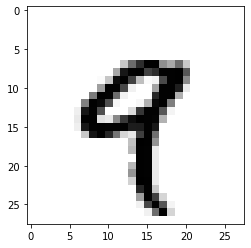

In [80]:
import matplotlib.pyplot as plt
digit = train_images[4]
plt.imshow(digit, cmap=plt.cm.binary)
plt.show()

당연히 해당 레이블은 정수 9입니다.

In [81]:
train_labels[4]

9

### NumPy에서 텐서 조작하기

이전 예제에서는 `train_images[i]` 구문을 사용하여 첫 번째 축을 따라 특정 숫자를 선택했습니다. 텐서에서 특정 요소를 선택하는 것을 텐서 슬라이싱이라고 합니다. NumPy 배열에서 수행할 수 있는 텐서 슬라이싱 연산을 살펴보겠습니다.

다음 예제는 10부터 100까지의 숫자(100은 제외)를 선택하여 (90, 28, 28) 형태의 배열에 저장합니다.

In [82]:
my_slice = train_images[10:100]
my_slice.shape

(90, 28, 28)

이는 각 텐서 축을 따라 슬라이스의 시작 인덱스와 종료 인덱스를 지정하는 보다 자세한 표기법과 동일합니다. 참고로, 콜론(:)은 전체 축을 선택하는 것과 같습니다.


In [83]:
my_slice = train_images[10:100, :, :]
my_slice.shape

(90, 28, 28)

In [84]:
my_slice = train_images[10:100, 0:28, 0:28]
my_slice.shape

(90, 28, 28)

일반적으로 각 텐서 축을 따라 임의의 두 인덱스 사이의 영역을 선택할 수 있습니다. 예를 들어 모든 이미지의 오른쪽 하단 모서리에 있는 14×14 픽셀 영역을 선택하려면 다음과 같이 하면 됩니다.

In [85]:
my_slice = train_images[:, 14:, 14:]

음수 인덱스를 사용하는 것도 가능합니다. 파이썬 리스트의 음수 인덱스와 마찬가지로, 현재 축의 끝을 기준으로 한 상대적인 위치를 나타냅니다. 이미지를 가운데를 중심으로 14×14 픽셀 크기의 패치로 자르려면 다음과 같이 하면 됩니다.

In [86]:
my_slice = train_images[:, 7:-7, 7:-7]

### The notion of data batches

일반적으로 딥러닝에서 접하게 되는 모든 데이터 텐서의 **첫 번째 축(인덱싱이 0부터 시작하기 때문에 축 0)은 샘플 축**입니다. MNIST 예시에서 "샘플"은 숫자 이미지입니다.

또한 딥러닝 모델은 전체 데이터셋을 한 번에 처리하는 것이 아니라, 데이터를 고정된 크기의 작은 "배치(batch)", 즉 샘플 그룹으로 나누어 처리합니다. 구체적으로, 배치 크기가 128인 MNIST 숫자 배치 하나는 다음과 같습니니다.

In [87]:
batch = train_images[:128]

다음은 그 다음 "배치"입니다.

In [88]:
batch = train_images[128:256]

그리고 n번째 배치:

In [89]:
n = 3
batch = train_images[128 * n:128 * (n + 1)]

이러한 배치 텐서를 고려할 때, 첫 번째 축(0번째 축)을 배치 축(또는 배치 차원)이라고 합니다. 케라스(Keras) 및 기타 딥러닝 라이브러리를 사용할 때 이 용어를 자주 접하게 될 것입니다.

### Real-world examples of data tensors

나중에 접하게 될 예시와 유사한 몇 가지 예제를 통해 데이터 텐서를 좀 더 구체적으로 살펴보겠습니다. 여러분이 다루게 될 데이터는 거의 항상 다음 범주 중 하나에 속합니다.

* **벡터 데이터** — (샘플, 특징) 형태의 2차 텐서로, 각 샘플은 숫자 속성("특징")의 벡터입니다.
* **시계열 데이터 또는 시퀀스 데이터** — (샘플, 타임스텝, 특징) 형태의 3차 텐서로, 각 샘플은 특징 벡터들의 시퀀스(길이는 타임스텝)입니다.
* **이미지** — (샘플, 높이, 너비, 채널) 형태의 4차 텐서로, 각 샘플은 픽셀로 이루어진 2차원 그리드이며, 각 픽셀은 값("채널")의 벡터로 표현됩니다.
* **비디오** — (샘플, 프레임, 높이, 너비, 채널) 형태의 5차 텐서로, 각 샘플은 이미지들의 시퀀스(길이는 프레임)입니다.

### Vector data
벡터 데이터는 가장 흔한 경우 중 하나입니다. 이러한 데이터셋에서는 각 데이터 포인트를 벡터로 인코딩할 수 있으며, 따라서 데이터 배치는 2차원 텐서(즉, 벡터 배열)로 인코딩됩니다. 여기서 첫 번째 축은 샘플 축이고 두 번째 축은 특징 축입니다.

두 가지 예를 살펴보겠습니다.

* 첫째, 사람들의 나이, 성별, 소득을 고려하는 보험 통계 데이터셋입니다. 각 사람은 세 가지 값으로 이루어진 벡터로 특징지어질 수 있으므로, 10만 명의 전체 데이터셋은 (100000, 3) 형태의 2차원 텐서에 저장할 수 있습니다.

* 둘째, 2만 개의 공통 단어로 구성된 사전에서 각 단어가 문서에 나타나는 횟수로 각 문서를 나타내는 텍스트 문서 데이터셋입니다. 각 문서는 20,000개의 값(사전에 있는 단어당 하나의 카운트)으로 이루어진 벡터로 인코딩될 수 있으므로 500개의 문서로 구성된 전체 데이터 세트는 (500, 20000) 형태의 텐서에 저장될 수 있습니다.

### Timeseries data or sequence data

데이터에서 시간(또는 순서)이 중요한 경우, 명시적인 시간 축을 가진 3차 텐서에 저장하는 것이 합리적입니다. 각 샘플은 벡터 시퀀스(2차 텐서)로 인코딩될 수 있으므로, 데이터 배치는 3차 텐서로 인코딩됩니다(그림 2.3 참조).


<img src="https://deeplearningwithpython.io/images/ch02/timeseries_data.a711cc5a.png" width="350"><p style="text-align:center">Figure 2.3 A rank-3 timeseries data tensor</p>

관례상 시간 축은 항상 두 번째 축(인덱스 1의 축)입니다. 몇 가지 예를 살펴보겠습니다.

* 주식 가격 데이터셋의 경우, 매분마다 현재 주가, 지난 1분 동안의 최고가, 그리고 지난 1분 동안의 최저가를 저장합니다. 따라서 매분은 3차원 벡터로 인코딩되고, 하루 거래량은 (390, 3) 형태의 행렬(하루 거래 시간은 390분)로 인코딩되며, 250일치의 데이터는 (250, 390, 3) 형태의 3차 텐서에 저장할 수 있습니다. 여기서 각 샘플은 하루치 데이터를 나타냅니다.
* 트윗 데이터셋의 경우, 각 트윗은 128개의 고유 문자로 이루어진 알파벳에서 추출한 280개의 문자로 구성된 시퀀스로 인코딩됩니다. 이 경우, 각 문자는 128 크기의 이진 벡터(해당 문자에 해당하는 인덱스의 항목 하나만 1이고 나머지는 모두 0인 벡터)로 인코딩될 수 있습니다. 그러면 각 트윗은 (280, 128) 형태의 랭크-2 텐서로 인코딩될 수 있고, 100만 개의 트윗 데이터셋은 (1000000, 280, 128) 벡터의 텐서(랭크-2 텐서)에 저장될 수 있으므로 데이터 배치는 랭크-3 텐서로 인코딩됩니다(그림 2.3 참조).

### Image data
이미지는 일반적으로 높이, 너비, 색상 깊이의 세 가지 차원을 가집니다. 회색조 이미지(MNIST 숫자 이미지처럼)는 단일 색상 채널만 가지므로 2차원 텐서에 저장할 수 있지만, 관례적으로 이미지 텐서는 항상 3차원이며 회색조 이미지의 경우 1차원 색상 채널을 사용합니다. 따라서 256 × 256 크기의 회색조 이미지 128개는 (128, 256, 256, 1) 형태의 텐서에 저장할 수 있고, 컬러 이미지 128개는 (128, 256, 256, 3) 형태의 텐서에 저장할 수 있습니다(그림 2.4 참조).

<img src="https://deeplearningwithpython.io/images/ch02/image_data.8accee38.png" width="350"><p style="text-align:center">Figure 2.4 A rank-4 image data tensor</p>

이미지 텐서의 형태에는 두 가지 규칙이 있습니다. 하나는 채널을 마지막에 배치하는 규칙(JAX, TensorFlow 및 대부분의 딥러닝 도구에서 표준)이고, 다른 하나는 채널을 먼저 배치하는 규칙(PyTorch에서 표준)입니다.

채널 마지막 규칙에서는 색상-깊이 축이 맨 끝에 위치합니다((샘플, 높이, 너비, 색상 깊이)). 반면, 채널 우선 규칙에서는 색상-깊이 축이 배치 축 바로 뒤에 위치합니다((샘플, 색상 깊이, 높이, 너비)). 채널 우선 규칙을 사용하면 앞의 예시는 (128, 1, 256, 256)과 (128, 3, 256, 256)이 됩니다. Keras API는 두 가지 형식 모두를 지원합니다.

### Video data
비디오 데이터는 5차 텐서가 필요한 몇 안 되는 실제 데이터 유형 중 하나입니다. 비디오는 각 프레임이 컬러 이미지인 프레임들의 시퀀스로 이해할 수 있습니다. 각 프레임은 3차 텐서(높이, 너비, 색상 깊이)에 저장할 수 있으므로, 프레임들의 시퀀스는 4차 텐서(프레임, 높이, 너비, 색상 깊이)에 저장할 수 있고, 따라서 여러 개의 비디오로 구성된 배치(batch)는 (샘플, 프레임, 높이, 너비, 색상 깊이) 형태의 5차 텐서에 저장할 수 있습니다.

예를 들어, 60초 길이의 144 × 256 크기 YouTube 비디오 클립을 초당 4프레임으로 샘플링하면 총 240개의 프레임이 생성됩니다. 이러한 비디오 클립 4개를 배치로 저장하면 (4, 240, 144, 256, 3) 형태의 텐서에 저장됩니다. 이는 총 106,168,320개의 값에 해당합니다! 텐서의 데이터 타입이 float32라면 각 값은 32비트로 저장되므로 텐서의 크기는 425MB에 달합니다. 엄청나게 크죠! 우리가 실제로 접하는 동영상은 float32로 저장되지 않고 MPEG 포맷처럼 높은 압축률을 사용하기 때문에 훨씬 가볍습니다.

## The gears of neural networks: tensor operations

모든 컴퓨터 프로그램이 궁극적으로 이진 입력에 대한 몇 가지 이진 연산(AND, OR, NOR 등)으로 축소될 수 있는 것처럼, 심층 신경망이 학습하는 모든 변환은 숫자 데이터 텐서에 적용되는 몇 가지 텐서 연산(또는 텐서 함수)으로 축소될 수 있습니다. 예를 들어, 텐서를 더하거나 곱하는 등의 연산이 가능합니다.

초기 예제에서는 Dense 레이어를 쌓아 모델을 구축했습니다. Keras 레이어 인스턴스는 다음과 같습니다.

> keras.layers.Dense(512, activation="relu")

이 레이어는 입력으로 행렬을 받아 입력 텐서에 대한 새로운 표현인 또 다른 행렬을 반환하는 함수로 해석할 수 있습니다. 구체적으로, 함수는 다음과 같습니다(여기서 W는 행렬이고 b는 벡터이며, 둘 다 레이어의 속성입니다).

> output = relu(matmul(input, W) + b)

이것을 자세히 살펴보겠습니다. 여기에는 세 가지 텐서 연산이 있습니다.

* 입력 텐서와 W라는 이름의 텐서 간의 텐서 곱(matmul) 연산
* 결과 행렬과 벡터 b 간의 덧셈(+) 연산
* relu 연산: relu(x)는 max(x, 0)입니다. "relu"는 "정류 선형 단위(REctified Linear Unit)"의 약자입니다.


이 섹션은 전적으로 선형 대수 표현식을 다루지만, 이 책에서는 수학적 표기법을 찾아볼 수 없습니다. 수학적 배경 지식이 없는 프로그래머들이 수학 방정식 대신 짧은 파이썬 코드 조각으로 표현된 수학적 개념을 더 쉽게 이해할 수 있다는 것을 알게 되었기 때문입니다. 따라서 이 책 전체에서 NumPy 코드를 사용할 것입니다.

### Element-wise operations

ReLU 활성화 함수와 덧셈은 요소별 연산입니다. 즉, 고려 중인 텐서의 각 요소에 독립적으로 적용되는 연산입니다. 따라서 이러한 연산은 대규모 병렬 구현(벡터화된 구현, 1970년대부터 1990년대까지의 벡터 프로세서 슈퍼컴퓨터 아키텍처에서 유래한 용어)에 매우 적합합니다. 요소별 연산을 파이썬으로 간단하게 구현하려면 for 루프를 사용하면 됩니다. 다음은 요소별 ReLU 활성화 함수 연산을 간단하게 구현한 예입니다.

In [88]:
def naive_relu(x):
    assert len(x.shape) == 2
    x = x.copy()
    for i in range(x.shape[0]):
        for j in range(x.shape[1]):
            x[i, j] = max(x[i, j], 0)
    return x

덧셈에도 같은 방법을 사용할 수 있습니다.

In [91]:
def naive_add(x, y):
    assert len(x.shape) == 2
    assert x.shape == y.shape
    x = x.copy()
    for i in range(x.shape[0]):
        for j in range(x.shape[1]):
            x[i, j] += y[i, j]
    return x

같은 원리로 요소별 곱셈, 뺄셈 등을 수행할 수 있습니다.

실제로 NumPy 배열을 다룰 때는 이러한 연산들이 최적화된 내장 NumPy 함수로 제공되며, 이 함수들은 복잡한 연산을 "기본 선형대수 서브프로그램(Basic Linear Algebra Subprograms: BLAS)" 구현에 위임합니다. BLAS는 저수준의 고병렬 효율적인 텐서 조작 루틴으로, 일반적으로 Fortran이나 C로 구현됩니다.

따라서 NumPy에서는 다음과 같은 요소별 연산을 매우 빠르게 수행할 수 있습니다.

In [ ]:
import numpy as np

# Element-wise addition
z = x + y
# Element-wise relu
z = np.maximum(z, 0.0)

실제로 시간 차이를 측정해 봅시다.

In [95]:
import time

x = np.random.random((20, 100))
y = np.random.random((20, 100))

t0 = time.time()
for _ in range(1000):
    z = x + y
    z = np.maximum(z, 0.)
print("Took: {0:.3f} s".format(time.time() - t0))

Took: 0.005 s


이 방법은 0.005초밖에 걸리지 않습니다. 반면, 단순한 방식은 무려 1.26초나 걸립니다.

In [104]:
t0 = time.time()
for _ in range(1000):
    z = naive_add(x, y)
    z = naive_relu(z)
print("Took: {0:.2f} s".format(time.time() - t0))

Took: 1.34 s


마찬가지로, GPU에서 JAX/TensorFlow/PyTorch 코드를 실행할 때 요소별 연산은 고도로 병렬화된 GPU 칩 아키텍처를 최대한 활용할 수 있는 완전 벡터화된 CUDA 구현을 통해 실행됩니다.

### Broadcasting

앞서 설명한 naive_add의 단순한 구현은 동일한 형태를 가진 랭크 2 텐서의 덧셈만 지원합니다. 하지만 앞서 소개한 Dense 레이어에서는 랭크 2 텐서와 벡터를 더했습니다. 두 텐서의 형태가 다를 경우 덧셈은 어떻게 될까요?

가능하고 모호성이 없다면, **작은 텐서는 큰 텐서의 형태에 맞춰 브로드캐스팅**됩니다. 브로드캐스팅은 두 단계로 이루어집니다.

* 먼저, 작은 텐서에 큰 텐서의 ndim에 맞춰 축(브로드캐스트 축)이 추가됩니다.

* 다음으로, 작은 텐서가 이 새로운 축들과 함께 반복되어 큰 텐서의 전체 형태를 갖추게 됩니다.

구체적인 예를 살펴보겠습니다. 형태가 (32, 10)인 X와 형태가 (10,)인 y를 생각해 보겠습니다.

In [68]:
import numpy as np

# X is a random matrix with shape (32, 10).
X = np.random.random((32, 10))
# y is a random vector with shape (10,).
y = np.random.random((10,))

먼저 y축에 빈 첫 번째 축을 추가하면 그 모양은 (1, 10)이 됩니다.

In [71]:
# The shape of y is now (1, 10).
y = np.expand_dims(y, axis=0)

그런 다음, 이 새로운 축을 따라 y를 32번 반복하여 Y[i, :] == y (i in range(0, 32)) 형태의 텐서 Y를 얻습니다.

In [74]:
# Repeat y 32 times along axis 0 to obtain Y with shape (32, 10).
Y = np.tile(y, (32, 1))

이 시점에서 X와 Y는 모양이 같으므로 더할 수 있습니다.

구현 측면에서 보면, 새로운 2차 텐서를 생성하지 않습니다. 그렇게 하면 효율성이 매우 떨어지기 때문입니다. 반복 연산은 완전히 가상적인 것으로, 메모리 수준이 아닌 알고리즘 수준에서 수행됩니다. 하지만 벡터가 새로운 축을 따라 32번 반복된다고 생각하면 이해하기 쉽습니다. 다음은 간단한 구현 예시입니다.

In [77]:
def naive_add_matrix_and_vector(x, y):
    # x is a rank-2 NumPy tensor.
    assert len(x.shape) == 2
    # y is a NumPy vector.
    assert len(y.shape) == 1
    assert x.shape[1] == y.shape[0]
    # Avoids overwriting the input tensor
    x = x.copy()
    for i in range(x.shape[0]):
        for j in range(x.shape[1]):
            x[i, j] += y[j]
    return x

브로드캐스팅을 사용하면 일반적으로 한 텐서의 형태가 (a, b, … n, n + 1, … m)이고 다른 텐서의 형태가 (n, n + 1, … m)인 경우 두 텐서에 요소별 연산을 적용할 수 있습니다. 브로드캐스팅은 a축부터 n-1축까지 자동으로 수행됩니다.

다음 예제는 브로드캐스팅을 통해 서로 다른 형태를 가진 두 텐서에 요소별 최댓값 연산을 적용하는 방법을 보여줍니다.

In [82]:
import numpy as np

# x is a random tensor with shape (64, 3, 32, 10).
x = np.random.random((64, 3, 32, 10))
# y is a random tensor with shape (32, 10).
y = np.random.random((32, 10))
# The output z has shape (64, 3, 32, 10) like x.
z = np.maximum(x, y)
# 
z.shape

(64, 3, 32, 10)

### Tensor product

텐서곱(tensor product), 또는 내적(dot product)이나 matmul(행렬 곱셈의 줄임말)이라고도 불리는 이 연산은 가장 흔하고 유용한 텐서 연산 중 하나입니다.

NumPy에서는 `np.matmul` 함수를, Keras에서는 `keras.ops.matmul` 함수를 사용하여 텐서곱을 수행합니다. 파이썬에서는 `@` 연산자를 사용하여 간단하게 표현할 수 있습니다.

In [84]:
x = np.random.random((32,))
y = np.random.random((32,))

# Takes the product between x and y
z = np.matmul(x, y)
# This is equivalent.
z = x @ y

수학적 표기법에서는 점(•)으로 연산을 나타냅니다(그래서 "내적"이라는 이름이 붙었습니다).

> z = x • y

수학적으로 matmul 연산은 무엇을 할까요? 두 벡터 x와 y의 곱을 예로 들어 보겠습니다. 계산식은 다음과 같습니다.

In [87]:
def naive_vector_product(x, y):
    # x and y are NumPy vectors.
    assert len(x.shape) == 1
    assert len(y.shape) == 1
    assert x.shape[0] == y.shape[0]
    z = 0.0
    for i in range(x.shape[0]):
        z += x[i] * y[i]
    return z

두 벡터의 곱은 스칼라 값이며, 같은 개수의 요소를 가진 벡터만 이 연산에 사용할 수 있다는 것을 이미 알고 계실 것입니다.

행렬 x와 벡터 y의 곱도 가능하며, 이 연산의 결과는 y와 x의 각 행의 곱으로 이루어진 벡터가 됩니다. 구현 방법은 다음과 같습니다.

In [135]:
def naive_matrix_vector_product(x, y):
    # x is a NumPy matrix.
    assert len(x.shape) == 2
    # y is a NumPy vector.
    assert len(y.shape) == 1
    # The 1st dimension of x must equal the 0th dimension of y!
    assert x.shape[1] == y.shape[0]
    # This operation returns a vector of 0s with as many rows as x.
    z = np.zeros(x.shape[0])
    for i in range(x.shape[0]):
        for j in range(x.shape[1]):
            z[i] += x[i, j] * y[j]
    return z

행렬-벡터 곱과 벡터 곱 사이의 관계를 보여주는 이전에 작성한 코드를 재사용할 수도 있습니다.

In [136]:
def naive_matrix_vector_product(x, y):
    z = np.zeros(x.shape[0])
    for i in range(x.shape[0]):
        z[i] = naive_vector_product(x[i, :], y)
    return z

두 텐서 중 하나라도 ndim 값이 1보다 커지면 matmul은 더 이상 대칭이 아니게 됩니다. 즉, matmul(x, y)는 matmul(y, x)와 같지 않습니다.

물론 텐서 곱은 축의 개수가 임의의 텐서로 일반화될 수 있습니다. 가장 일반적인 응용 사례는 두 행렬의 곱입니다. 두 행렬 x와 y의 곱(matmul(x, y))은 x.shape[1] == y.shape[0]인 경우에만 가능합니다. 결과는 (x.shape[0], y.shape[1]) 형태의 행렬이 되며, 계수는 x의 행과 y의 열의 벡터곱입니다. 다음은 간단한 구현입니다.

In [137]:
def naive_matrix_product(x, y):
    # x and y are NumPy matrices.
    assert len(x.shape) == 2
    assert len(y.shape) == 2
    # The 1st dimension of x must equal the 0th dimension of y!
    assert x.shape[1] == y.shape[0]
    # This operation returns a matrix of 0s with a specific shape.
    z = np.zeros((x.shape[0], y.shape[1]))
    # Iterates over the rows of x ...
    for i in range(x.shape[0]):
        # ... and over the columns of y.
        for j in range(y.shape[1]):
            row_x = x[i, :]
            column_y = y[:, j]
            z[i, j] = naive_vector_product(row_x, column_y)
    return z

벡터곱의 형태 호환성을 이해하려면 그림 2.5와 같이 입력 및 출력 텐서를 정렬하여 시각화하는 것이 도움이 됩니다.

<img src="https://deeplearningwithpython.io/images/ch02/matrix_dot_box_diagram.3dc0f796.png" width="350"><p style="text-align:center">Figure 2.5 Matrix dot-product box diagram</p>

x, y, z는 직사각형(문자 그대로 계수들의 상자)으로 표현됩니다. x의 행과 y의 열은 크기가 같아야 하므로, x의 너비는 y의 높이와 같아야 합니다. 앞으로 새로운 머신러닝 알고리즘을 개발하다 보면 이러한 다이어그램을 자주 그리게 될 것입니다.

더 일반적으로는, 앞서 2차원 경우에서 설명한 것과 동일한 모양 호환성 규칙을 적용하여 고차원 텐서의 곱을 구할 수 있습니다.

> (a, b, c, d) • (d,) -> (a, b, c)

> (a, b, c, d) • (d, e) -> (a, b, c, e)

### Tensor reshaping

이해해야 할 세 번째 텐서 연산 유형은 텐서 모양변경(reshape)입니다. 첫 번째 신경망 예제의 Dense 레이어에서는 사용되지 않았지만, 모델에 입력하기 전에 숫자 데이터를 전처리할 때 사용했습니다.

In [51]:
train_images = train_images.reshape((60000, 28 * 28))

텐서의 형태를 변경한다는 것은 행과 열을 재배열하여 원하는 형태에 맞추는 것을 의미합니다. 당연히 형태가 변경된 텐서는 초기 텐서와 동일한 총 계수 개수를 갖습니다. 형태 변경은 간단한 예제를 통해 가장 잘 이해할 수 있습니다.

In [125]:
x = np.array([[0., 1.],
             [2., 3.],
             [4., 5.]])
x.shape

(3, 2)

In [127]:
x = x.reshape((6, 1))
x

array([[0.],
       [1.],
       [2.],
       [3.],
       [4.],
       [5.]])

In [129]:
x = x.reshape((2, 3))
x

array([[0., 1., 2.],
       [3., 4., 5.]])

일반적으로 접하는 특별한 형태의 행렬 전치는 행렬의 행과 열을 서로 바꾸는 것입니다. 예를 들어 x[i, :]는 x[:, i]가 됩니다.

In [132]:
# Creates an all-zeros matrix of shape (300, 20)
x = np.zeros((300, 20))
x = np.transpose(x)
x.shape

(20, 300)

### Geometric interpretation of tensor operations

텐서 연산에 의해 조작되는 텐서의 내용은 어떤 기하학적 공간의 점 좌표로 해석될 수 있기 때문에 모든 텐서 연산은 기하학적 해석을 갖습니다. 예를 들어, 덧셈을 생각해 보겠습니다. 다음 벡터에서 시작하겠습니다.
> A = [0.5, 1]

이것은 2차원 공간의 한 점입니다(그림 2.6 참조). 그림 2.7에서처럼 벡터는 원점과 점을 연결하는 화살표로 나타내는 것이 일반적입니다.



<img src="https://deeplearningwithpython.io/images/ch02/geometric_interpretation_1.4c2c1983.png" width="250"><p style="text-align:center">Figure 2.6  A point in a 2D space</p>

<img src="https://deeplearningwithpython.io/images/ch02/geometric_interpretation_2.e635ec60.png" width="250"><p style="text-align:center">Figure 2.7 A point in a 2D space pictured as an arrow</p>

이제 새로운 점 B = [1, 0.25]를 이전 점에 더해 보겠습니다. 이는 벡터 화살표를 연결하여 기하학적으로 구현되며, 결과적인 위치는 이전 두 벡터의 합을 나타내는 벡터가 됩니다(그림 2.8 참조). 보시다시피, 벡터 A에 벡터 B를 더하는 것은 점 A를 새로운 위치에 복사하는 것을 의미하며, 이 새로운 위치에서 원래 점 A까지의 거리와 방향은 벡터 B에 의해 결정됩니다. 평면상의 여러 점(‘객체’)에 동일한 벡터 덧셈을 적용하면 전체 객체의 복사본을 새로운 위치에 생성하게 됩니다(그림 2.9 참조). 따라서 텐서 덧셈은 객체를 특정 방향으로 특정량만큼 이동시키는 것(객체를 변형시키지 않고 이동시키는 것)을 나타냅니다.

<img src="https://deeplearningwithpython.io/images/ch02/geometric_interpretation_3.b1b80fb9.png" width="250"><p style="text-align:center">Figure 2.8 Geometric interpretation of the sum of two vectors</p>

일반적으로 평행 이동, 회전, 크기 조절, 기울이기 등과 같은 기본적인 기하학적 연산은 텐서 연산으로 표현할 수 있습니다. 몇 가지 예를 들어 보겠습니다.

* **평행 이동** — 방금 보셨듯이, 한 점에 벡터를 더하면 그 점은 일정한 양만큼 일정한 방향으로 이동합니다. 여러 점으로 이루어진 집합(예: 2차원 객체)에 이러한 연산을 적용하는 것을 "평행 이동"이라고 합니다(그림 2.9 참조).

<img src="https://deeplearningwithpython.io/images/ch02/translation.c123da84.png" width="350"><p style="text-align:center">Figure 2.9 2D translation as a vector addition</p>

* 회전 — 2D 벡터를 각도 theta만큼 반시계 방향으로 회전시키는 것은 (그림 2.10 참조) 2 × 2 행렬
$$R = [[\cos(\theta),-\sin(\theta)], [\sin (\theta), \cos(\theta)]]$$ 
를 사용하여 구현할 수 있습니다.

<img src="https://deeplearningwithpython.io/images/ch02/rotation.8f4da7c4.png" width="350"><p style="text-align:center">Figure 2.10 2D rotation
(counterclockwise) as a dot product</p>


* 크기 조정 — 이미지의 수직 및 수평 크기 조정(그림 2.11 참조)은 2 × 2 행렬 S = [[horizontal_factor, 0], [0, vertical_factor]]를 사용하여 수행할 수 있습니다(이러한 행렬은 왼쪽 위에서 오른쪽 아래로 가는 "대각선"에만 0이 아닌 계수가 있기 때문에 "대각 행렬"이라고 합니다).

<img src="https://deeplearningwithpython.io/images/ch02/scaling.8cca5e17.png" width="350"><p style="text-align:center">Figure 2.11 2D scaling as a dot product</p>

* 선형 변환 — 임의의 행렬과의 곱셈은 선형 변환을 구현합니다. 앞서 살펴본 스케일링과 회전은 정의상 선형 변환입니다.
* 어파인(affine) 변환 — 어파인 변환(그림 2.12 참조)은 선형 변환(행렬 곱셈을 통해 구현)과 변환(벡터 덧셈을 통해 구현)의 조합입니다. 아마 눈치채셨겠지만, 이는 Dense 레이어에서 구현되는 y = W @ x + b 계산과 정확히 일치합니다! 활성화 함수가 없는 Dense 레이어는 아핀 레이어입니다.

<img src="https://deeplearningwithpython.io/images/ch02/affine_transform.80be4403.png" width="350"><p style="text-align:center">Figure 2.12 Affine transform in the plane</p>

* ReLU 활성화 함수를 사용하는 Dense 레이어 — 아핀 변환에 대한 중요한 관찰 사항은 여러 번 반복적으로 적용하더라도 결국에는 아핀 변환이 된다는 것입니다(따라서 처음부터 하나의 아핀 변환만 적용해도 됩니다). 두 개의 아핀 변환을 적용해 보겠습니다. affine2(affine1(x)) = W2 @ (W1 @ x + b1) + b2 = (W2 @ W1) @ x + (W2 @ b1 + b2). 이것은 선형 부분이 행렬 W2 @ W1이고 변환 부분이 벡터 W2 @ b1 + b2인 아핀 변환입니다. 결과적으로 활성화 함수 없이 Dense 레이어만으로 구성된 다층 신경망은 단일 Dense 레이어와 동일합니다. 이러한 "심층" 신경망은 사실상 선형 모델일 뿐입니다! 이것이 바로 ReLU와 같은 활성화 함수가 필요한 이유입니다(그림 2.13 참조). 활성화 함수 덕분에, Dense 레이어들을 연결하여 매우 복잡하고 비선형적인 기하학적 변환을 구현할 수 있으며, 이는 심층 신경망을 위한 매우 풍부한 가설 공간을 만들어냅니다. 이 개념은 다음 장에서 더 자세히 다룹니다.

<img src="https://deeplearningwithpython.io/images/ch02/dense_transform.d8a02328.png" width="350"><p style="text-align:center">Figure 2.13 Affine transform followed by relu activation</p>

### 딥러닝의 기하학적 해석

신경망은 텐서 연산의 연속으로 이루어져 있으며, 이러한 텐서 연산은 모두 입력 데이터의 간단한 기하학적 변환이라는 것을 방금 배웠습니다. 따라서 신경망은 일련의 간단한 단계를 통해 구현되는 고차원 공간에서의 매우 복잡한 기하학적 변환으로 해석할 수 있습니다.

3차원 공간에서는 다음과 같은 이미지가 도움이 될 수 있습니다. 빨간색과 파란색 두 장의 색종이를 상상해 보세요. 한 장을 다른 한 장 위에 올려놓고, 두 장을 작은 공처럼 구겨 보세요. 이 구겨진 종이 공이 입력 데이터이고, 각 종이는 분류 문제에서 하나의 데이터 클래스에 해당합니다. 신경망은 두 클래스를 다시 명확하게 구분할 수 있도록 종이 공을 펴는 변환을 찾아내는 역할을 합니다(그림 2.14 참조). 딥러닝에서는 이러한 변환이 마치 손가락으로 종이 공을 한 번에 한 번씩 움직이는 것처럼 3차원 공간에서 일련의 간단한 변환으로 구현됩

<img src="https://deeplearningwithpython.io/images/ch02/geometric_interpretation_4.f8123b83.png" width="550">
<p style="text-align:center">Figure 2.14 Uncrumpling a complicated manifold of data</p>


종이 뭉치를 펴는 것과 같은 원리가 머신 러닝의 핵심입니다. 복잡하고 고도로 접힌 데이터 매니폴드를 고차원 공간에서 깔끔하게 표현하는 방법을 찾는 것이죠. (매니폴드는 구겨진 종이처럼 연속적인 표면을 의미합니다.) 딥 러닝이 왜 이 분야에서 뛰어난지 이제 어느 정도 이해가 되실 겁니다. 딥 러닝은 복잡한 기하학적 변환을 점진적으로 여러 개의 기본 변환으로 분해하는 방식을 사용하는데, 이는 사람이 종이 뭉치를 펴는 과정과 매우 유사합니다. 딥 네트워크의 각 레이어는 데이터를 조금씩 풀어주는 변환을 적용하며, 여러 레이어를 쌓아 올리면 매우 복잡한 변환 과정도 효율적으로 처리할 수 있게 됩니다.니다.니다.

## The engine of neural networks: gradient-based optimization
이전 섹션에서 보셨듯이, 첫 번째 모델 예제의 각 신경 계층은 입력 데이터를 다음과 같이 변환합니다.

```
output = relu( dot(input, W) + b )
```

이 표현식에서 $W$와 $b$는 레이어의 속성을 나타내는 텐서입니다. 이들은 레이어의 가중치 또는 학습 가능한 파라미터(각각 커널 및 바이어스 속성)라고 불립니다. 이러한 가중치에는 모델이 훈련 데이터에 노출되어 학습한 정보가 담겨 있습니다.

초기에는 이러한 가중치 행렬이 작은 무작위 값으로 채워집니다(랜덤 초기화 단계). 물론 $W$와 $b$가 무작위 값일 때 **relu(matmul(input, W) + b)** 가 유용한 표현을 생성할 것이라고 기대할 이유는 없습니다. 결과 표현은 의미가 없지만, 시작점입니다. 다음 단계는 피드백 신호를 기반으로 이러한 가중치를 점진적으로 조정하는 것입니다. 훈련이라고도 하는 이 점진적인 조정이 바로 머신 러닝의 핵심 학습 과정입니다.

이 과정은 훈련 루프라고 하는 일련의 단계를 통해 진행됩니다. 손실이 충분히 낮아질 때까지 다음 단계를 반복합니다.

* 훈련 샘플 배치 x와 이에 해당하는 목표값 y_true를 추출합니다.
* 모델을 x에 적용하여 예측값 y_pred를 얻습니다(순방향 전달 단계).
* 배치에 대한 모델의 손실을 계산합니다. 손실은 y_pred와 y_true 간의 불일치 정도를 나타냅니다.
* 이 배치에 대한 손실을 약간 줄이는 방식으로 모델의 모든 가중치를 업데이트합니다.

결국, 훈련 데이터에 대한 손실이 매우 낮은 모델, 즉 예측값 y_pred와 예상 목표값 y_true 간의 불일치가 낮은 모델을 얻게 됩니다. 모델이 입력값을 올바른 목표값에 매핑하는 방법을 "학습"한 것입니다. 멀리서 보면 마법처럼 보일 수 있지만, 단계별로 살펴보면 매우 간단합니다.

1단계는 입출력 코드이므로 매우 쉽습니다. 2단계와 3단계는 몇 가지 텐서 연산을 수행하는 것이므로 이전 섹션에서 배운 내용을 바탕으로 구현할 수 있습니다. 어려운 부분은 4단계, 즉 모델의 가중치를 업데이트하는 단계입니다. 모델의 개별 가중치 계수가 주어졌을 때, 해당 계수를 증가시켜야 할지 감소시켜야 할지, 그리고 얼마나 증가시켜야 할지를 어떻게 계산할 수 있을까요?

한 가지 단순한 해결책은 고려 중인 스칼라 계수 하나를 제외한 모델의 모든 가중치를 고정하고, 이 계수에 다양한 값을 대입해 보는 것입니다. 예를 들어, 초기 계수 값이 0.3이라고 가정해 보겠습니다. 데이터 배치에 대한 순방향 전달 후 모델의 손실이 0.5라고 나왔습니다. 계수 값을 0.35로 변경하고 순방향 전달을 다시 실행하면 손실이 0.6으로 증가합니다. 하지만 계수 값을 0.25로 낮추면 손실이 0.4로 감소합니다. 이 경우, 계수 값을 -0.05만큼 업데이트하는 것이 손실을 최소화하는 데 도움이 되는 것처럼 보입니다. 하지만 이러한 과정을 모델의 모든 계수에 대해 반복해야 합니다.

그러나 이러한 접근 방식은 매우 비효율적입니다. 각 계수마다 두 번의 순방향 전달(비용이 많이 드는 연산)을 수행해야 하기 때문입니다. 모델의 계수는 일반적으로 수천 개에서 수십억 개에 이를 수도 있습니다. 다행히 훨씬 더 나은 접근 방식이 있습니다. 바로 **경사 하강법**입니다.

경사 하강법은 현대 신경망의 핵심 최적화 기법입니다. 간단히 설명하자면, 모델에서 사용되는 모든 함수(예: matmul 또는 +)는 입력값을 부드럽고 연속적인 방식으로 변환합니다. 예를 들어 z = x + y를 보면, y의 작은 변화는 z의 작은 변화만을 가져오고, y의 변화 방향을 알면 z의 변화 방향도 추론할 수 있습니다. 수학적으로 이러한 함수들은 미분 가능하다고 할 수 있습니다. 이러한 함수들을 연결해도 더 큰 함수는 여전히 미분 가능합니다. 특히, 이는 모델 계수를 데이터 배치에 대한 모델 손실로 매핑하는 함수에 적용됩니다. 모델 계수의 작은 변화는 손실 값의 작고 예측 가능한 변화를 가져옵니다. 따라서 경사라는 수학적 연산자를 사용하여 모델 계수를 다양한 방향으로 움직일 때 손실이 어떻게 변하는지 나타낼 수 있습니다. 이 기울기를 계산하면 손실이 감소하는 방향으로 계수들을 이동시킬 수 있습니다(한 번에 하나씩이 아니라 모두 한 번에 업데이트할 수 있습니다).

미분 가능성과 기울기가 무엇인지 이미 알고 있다면 다음 두 섹션을 건너뛰셔도 됩니다. 그렇지 않다면 다음 내용이 이러한 개념을 이해하는 데 도움이 될 것입니다.

### What's a derivative?

연속적이고 매끄러운 함수 f(x) = y를 생각해 봅시다. 이 함수는 숫자 x를 새로운 숫자 y로 매핑합니다. 그림 2.15의 함수를 예로 사용할 수 있습니다.on

<img src="https://deeplearningwithpython.io/images/ch02/function.4b000cb3.png" width="200">
<p style="text-align:center">Figure 2.15 A continuous, smooth function</p>

함수가 연속적이므로 x의 작은 변화는 y의 작은 변화만을 초래합니다. 이것이 연속성의 기본 원리입니다. 예를 들어 x를 작은 값인 엡실론_x만큼 증가시키면 그림 2.16에서 볼 수 있듯이 y는 작은 엡실론_y만큼 변화합니다.

<img src="https://deeplearningwithpython.io/images/ch02/continuity.98fd80b7.png" width="240">
<p style="text-align:center">Figure 2.16 With a continuous function, a small change in x results in a small change in y.</p>

또한, 함수가 매끄럽기 때문에(곡선에 급격한 각도가 없기 때문에), 
epsilon_x가 충분히 작을 때, 특정 지점 p 부근에서 f를 기울기 a를 갖는 선형 함수로 근사할 수 있으므로 epsilon_y는 a * epsilon_x가 됩니다.

$$ f(x + \text{epsilon_x}) = y + a * \ text{epsilon_x}$$

당연히 이 선형 근사는 x가 p에 충분히 가까울 때만 유효합니다.

기울기 a는 함수 f의 p에 대한 미분이라고 합니다. 
a가 음수이면 그림 2.17에서처럼 p 근처에서 x가 조금 증가할 때 f(x)는 감소하고, a가 양수이면 x가 조금 증가할 때 f(x)는 증가합니다. 
또한, a의 절댓값(미분의 크기)은 이러한 증가 또는 감소가 얼마나 빠르게 일어나는지를 나타냅니다.

<img src="https://deeplearningwithpython.io/images/ch02/derivation.306de198.png" width="220">
<p style="text-align:center">Figure 2.17 Derivative of f in p</p>

모든 미분 가능한 함수 f(x)에 대해 (미분 가능하다는 것은 "미분할 수 있다"는 의미입니다. 예를 들어, 매끄럽고 연속적인 함수는 미분 가능합니다), x 값을 해당 점에서 f의 국소 선형 근사의 기울기로 매핑하는 도함수 f'(x)가 존재합니다. 예를 들어, cos(x)의 도함수는 -sin(x)이고, f(x) = a * x의 도함수는 f'(x) = a입니다.

함수를 미분할 수 있다는 것은 최적화, 즉 f(x) 값을 최소화하는 x 값을 찾는 데 매우 강력한 도구입니다. f(x)를 최소화하기 위해 x 값을 엡실론_x만큼 변화시키려고 할 때, f의 도함수를 알고 있다면 작업이 완료된 것입니다. 도함수는 x 값의 변화에 ​​따라 f(x)가 어떻게 변하는지 완벽하게 설명해 주기 때문입니다. f(x) 값을 줄이려면 도함수의 반대 방향으로 x 값을 조금만 움직이면 됩니다.

### Derivative of a tensor operation: the gradient

방금 살펴본 함수는 스칼라 값 x를 다른 스칼라 값 y로 변환하는 함수였습니다. 이 함수는 2차원 평면에 곡선으로 나타낼 수 있습니다. 이제 스칼라 튜플 (x, y)을 스칼라 값 z로 변환하는 함수를 상상해 보세요. 이것은 벡터 연산입니다. 이 함수는 3차원 공간(좌표 x, y, z로 표시됨)에 2차원 곡면으로 나타낼 수 있습니다. 마찬가지로, 입력으로 행렬을 받는 함수, 3차 텐서를 받는 함수 등을 상상할 수 있습니다.

미분이라는 개념은 함수가 나타내는 곡면이 연속적이고 매끄럽기만 하면 어떤 함수에도 적용할 수 있습니다. 텐서 연산(또는 텐서 함수)의 미분을 기울기(gradient)라고 합니다. 기울기는 텐서를 입력으로 받는 함수에 대한 미분 개념의 일반화입니다. 스칼라 함수의 경우 미분이 함수 곡선의 국소적인 기울기를 나타낸다는 것을 기억하시나요? 마찬가지로 텐서 함수의 그래디언트는 함수가 나타내는 다차원 표면의 곡률을 나타냅니다. 이는 입력 매개변수가 변할 때 함수의 출력이 어떻게 변하는지를 특징짓습니다.

머신 러닝에 기반한 예를 ​​살펴보겠습니다. 다음을 고려해 보세요.

* 입력 벡터 x (데이터셋의 샘플)
* 행렬 W (모델의 가중치)
* 목표값 y_true (모델이 x에 대해 학습해야 하는 값)
* 손실 함수 loss (모델의 현재 예측값과 y_true 사이의 차이를 측정하는 함수)

W를 사용하여 목표 후보 y_pred를 계산한 다음, 목표 후보 y_pred와 목표값 y_true 사이의 손실, 즉 불일치를 계산할 수 있습니다.


```
# We use the model weights W to make a prediction for x.
y_pred = matmul(x, W)
# We estimate how far off the prediction was.
loss_value = loss(y_pred, y_true)
```

이제 기울기를 이용하여 손실 값을 줄이기 위해 W를 어떻게 업데이트해야 할지 알아내려고 합니다. 어떻게 하면 될까요?

고정된 입력값 x와 y_true가 주어졌을 때, 앞서 수행한 연산들은 W(모델의 가중치) 값을 손실 값에 매핑하는 함수로 해석될 수 있습니다.

```
# f describes the curve (or high-dimensional surface) formed by loss
# values when W varies.
loss_value = f(W)
```

현재 W 값을 W0라고 가정해 보겠습니다. 그러면 W0 지점에서의 함수 f의 미분은 W와 동일한 형태를 가진 텐서 grad(loss_value, W0)가 됩니다. 여기서 각 계수 grad(loss_value, W0)[i, j]는 W0[i, j]를 변경할 때 관찰되는 loss_value의 변화 방향과 크기를 나타냅니다. 이 텐서 grad(loss_value, W0)는 W0에서 함수 f(W) = loss_value의 기울기이며, "W0 주변에서 W에 대한 loss_value의 기울기"라고도 합니다.

> 텐서 연산 grad(f(W), W) (입력으로 행렬 W를 받음)는 스칼라 함수 grad_ij(f(W), w_ij)의 조합으로 표현될 수 있으며, 각 함수는 다른 모든 계수가 상수라고 가정할 때 loss_value = f(W)를 W의 계수 W[i, j]에 대해 미분한 값을 반환합니다. grad_ij는 f를 W[i, j]에 대해 편미분한 값입니다.

구체적으로, grad(loss_value, W0)는 무엇을 나타낼까요? 앞서 함수 f(x)의 단일 계수에 대한 미분은 함수 f의 곡선 기울기로 해석될 수 있음을 살펴보았습니다. 마찬가지로, grad(loss_value, W0)는 loss_value = f(W)가 W0를 중심으로 어떻게 변하는지를 나타내는 텐서로 해석할 수 있습니다. 각 편미분은 특정 방향으로의 f의 곡률을 나타냅니다.

함수 f(x)의 경우, x를 미분 방향의 반대 방향으로 조금 이동시키면 f(x) 값을 줄일 수 있다는 것을 방금 살펴보았습니다. 이와 매우 유사하게, 텐서 함수 f(W)의 경우, loss_value = f(W)를 기울기 방향의 반대 방향으로 W를 이동시켜 줄일 수 있습니다. 예를 들어, W1 = W0 - step * grad(f(W0), W0)와 같이 업데이트할 수 있으며, 여기서 step은 작은 스케일링 계수입니다. 이는 곡률에 반하는 방향으로 이동하는 것을 의미하며, 직관적으로 곡선 상에서 더 낮은 위치로 이동하게 됩니다. 참고로, grad(loss_value, W0)는 W0에 가까울 때만 곡률을 근사화하므로 스케일링 계수 단계가 필요합니다. 따라서 W0에서 너무 멀어지지 않도록 해야 합니다.

### Stochastic gradient descent

미분 가능한 함수가 주어지면 이론적으로 해석적으로 최솟값을 찾을 수 있습니다. 함수의 최솟값은 도함수가 0이 되는 지점이라는 것이 알려져 있으므로, 도함수가 0이 되는 모든 지점을 찾고 이 지점들 중 함수값이 가장 작은 지점을 찾으면 됩니다.

신경망에 적용하면, 이는 손실 함수값이 최소가 되는 가중치 값의 조합을 해석적으로 찾는 것을 의미합니다. 이는 grad(f(W), W) = 0이라는 방정식을 W에 대해 풀면 얻을 수 있습니다. 이 방정식은 N개의 변수를 갖는 다항식이며, 여기서 N은 모델의 계수 개수입니다. N=2 또는 N=3인 경우 이러한 방정식을 풀 수 있지만, 실제 신경망에서는 매개변수 개수가 수천 개에서 수십억 개에 달할 수 있으므로 이러한 방식은 현실적으로 불가능합니다.

대신, 이 섹션의 시작 부분에서 설명한 4단계 알고리즘을 사용할 수 있습니다. 즉, 임의의 데이터 배치에 대한 현재 손실값을 기반으로 매개변수를 조금씩 수정하는 것입니다. 미분 가능한 함수를 다루기 때문에 기울기를 계산할 수 있으며, 이를 통해 4단계를 효율적으로 구현할 수 있습니다. 기울기와 반대 방향으로 가중치를 업데이트하면 손실이 매번 조금씩 줄어듭니다.

* 훈련 샘플 배치 x와 이에 해당하는 목표값 y_true를 추출합니다.
* x에 대해 모델을 실행하여 예측값 y_pred를 얻습니다(순방향 전달).
* 배치에 대한 모델의 손실을 계산합니다. 이 손실은 y_pred와 y_true 간의 불일치 정도를 나타냅니다.
* 모델 매개변수에 대한 손실의 기울기를 계산합니다(역방향 전달).
* 기울기와 반대 방향으로 매개변수를 조금씩 조정합니다. 예를 들어, W -= learning_rate * gradient와 같이 조정하면 배치에 대한 손실이 약간 줄어듭니다. 여기서 학습률(learning_rate)은 경사 하강법의 "속도"를 조절하는 스칼라 값입니다.

매우 간단하죠! 방금 설명한 것은 미니배치 확률적 경사 하강법(mini-batch SGD)이라고 합니다. '확률적'이라는 용어는 각 데이터 배치가 무작위로 추출된다는 사실을 나타냅니다(확률적은 과학에서 무작위의 동의어입니다). 그림 2.18은 모델에 매개변수가 하나만 있고 훈련 샘플이 하나만 있는 1차원 환경에서 어떤 일이 발생하는지 보여줍니다.

<img src="https://deeplearningwithpython.io/images/ch02/sgd_explained_1.0535e152.png" width="200"><p style="text-align:center">Figure 2.18 SGD down a 1D loss curve (one learnable parameter)
</p>

직관적으로 볼 때, 학습률(learning_rate) 값을 적절하게 선택하는 것이 중요하다는 것을 알 수 있습니다. 학습률이 너무 작으면 하강 곡선을 따라 내려가는 데 많은 반복이 필요하고, 지역 최솟값에 갇힐 수 있습니다. 반대로 학습률이 너무 크면 업데이트가 곡선 상의 완전히 임의적인 위치로 이어질 수 있습니다.

미니배치 SGD 알고리즘의 변형으로, 매 반복마다 데이터 배치를 사용하는 대신 단일 샘플과 목표값을 추출하는 방법이 있습니다. 이것이 바로 진정한 SGD(미니배치 SGD와는 다름)입니다. 반대로, 모든 데이터를 사용하여 매 단계를 실행하는 배치 경사 하강법도 있습니다. 이 경우 각 업데이트는 더 정확해지지만, 훨씬 더 많은 비용이 소요됩니다. 이 두 극단적인 방법 사이의 효율적인 절충안은 적절한 크기의 미니배치를 사용하는 것입니다.

그림 2.18은 1차원 파라미터 공간에서의 경사 하강법을 보여주지만, 실제로는 고차원 공간에서 경사 하강법을 사용하게 됩니다. 신경망의 모든 가중치 계수는 공간에서 하나의 자유 차원에 해당하며, 그 수는 수만 개, 심지어 수백만 개에 달할 수도 있습니다. 손실 함수에 대한 직관을 키우는 데 도움이 되도록 그림 2.19와 같이 2차원 손실 함수를 따라 경사 하강법을 시각화할 수도 있습니다. 하지만 신경망을 훈련하는 실제 과정을 시각화하는 것은 불가능합니다. 100만 차원의 공간을 인간이 이해할 수 있는 방식으로 표현하는 것은 불가능하기 때문입니다. 따라서 이러한 저차원 표현을 통해 얻은 직관이 실제 상황에서 항상 정확한 것은 아닐 수 있다는 점을 명심해야 합니다. 이는 딥러닝 연구 분야에서 오랫동안 문제점으로 지적되어 온 부분입니다.


<img src="https://deeplearningwithpython.io/images/ch02/gradient_descent_3d.85d77c73.png" width="300"><p style="text-align:center">Figure 2.19 Gradient descent down a 2D loss surface (two learnable parameters)
</p>

또한, SGD에는 현재의 기울기 값만 고려하는 것이 아니라 이전 가중치 업데이트를 고려하여 다음 가중치 업데이트를 계산하는 여러 변형이 존재합니다. 예를 들어, 모멘텀을 사용하는 SGD, Adagrad, RMSprop 등이 있습니다. 이러한 변형들은 최적화 방법 또는 옵티마이저로 알려져 있습니다. 특히, 이러한 변형들에서 많이 사용되는 모멘텀 개념에 주목할 필요가 있습니다. 모멘텀은 SGD의 두 가지 문제점, 즉 수렴 속도와 지역 최소값을 해결합니다. 그림 2.20은 모델 매개변수에 대한 손실 함수의 곡선을 보여줍니다.

<img src="https://deeplearningwithpython.io/images/ch02/global_minimum.8f000c0a.png" width="250"><p style="text-align:center">Figure 2.20 A local minimum and a global minimum</p>

보시다시피, 특정 매개변수 값 부근에 지역 최소값이 존재합니다. 이 지점 근처에서 왼쪽으로 이동하면 손실이 증가하고, 오른쪽으로 이동해도 마찬가지입니다. 만약 고려 중인 매개변수를 작은 학습률을 가진 SGD로 최적화한다면, 최적화 과정은 전역 최소값으로 향하지 않고 지역 최소값에 갇히게 됩니다.

이러한 문제를 피하기 위해 물리학에서 영감을 얻은 모멘텀을 사용할 수 있습니다. 최적화 과정을 손실 곡선을 따라 굴러 내려가는 작은 공으로 생각하면 이해하기 쉽습니다. 충분한 모멘텀이 있다면 공은 낭떠러지에 갇히지 않고 전역 최소값에 도달할 것입니다. 모멘텀은 각 단계에서 현재 기울기 값(현재 가속도)뿐만 아니라 현재 속도(이전 가속도에 의해 결정됨)를 기반으로 공을 이동시키는 방식으로 구현됩니다. 실제로 이는 현재 기울기 값뿐만 아니라 이전 매개변수 업데이트 값을 기반으로 매개변수 w를 업데이트하는 것을 의미하며, 다음은 간단한 구현 예입니다.



In [ ]:
past_velocity = 0.0
# Constant momentum factor
momentum = 0.1
# Optimization loop
while loss > 0.01:
    w, loss, gradient = get_current_parameters()
    velocity = past_velocity * momentum - learning_rate * gradient
    w = w + momentum * velocity - learning_rate * gradient
    past_velocity = velocity
    update_parameter(w)

### Chaining derivatives: The Backpropagation algorithm

#### The chain rule

#### Automatic differentiation with computation graphs
<img src="https://drek4537l1klr.cloudfront.net/chollet2/Figures/02-21.png" width="150"><p style="text-align:center">Figure 2.21 The computation graph representation of our two-layer model</p>


<img src="https://drek4537l1klr.cloudfront.net/chollet2/Figures/02-22.png" width="150"><p style="text-align:center">Figure 2.22 A basic example of a computation graph</p>


<img src="https://drek4537l1klr.cloudfront.net/chollet2/Figures/02-23.png" width="150"><p style="text-align:center">Figure 2.23 Running a forward pass</p>


<img src="https://drek4537l1klr.cloudfront.net/chollet2/Figures/02-24.png" width="300"><p style="text-align:center">Figure 2.24 Running a backward pass
</p>


<img src="https://drek4537l1klr.cloudfront.net/chollet2/Figures/02-25.png" width="300"><p style="text-align:center">Figure 2.25 Path from loss_val to w in the backward graph</p>


### Chaining derivatives: The Backpropagation algorithm

앞서 살펴본 알고리즘에서 우리는 함수가 미분 가능하기 때문에 기울기를 쉽게 계산할 수 있다고 가정했습니다. 하지만 정말 그럴까요? 실제로 복잡한 표현식의 기울기를 어떻게 계산할 수 있을까요? 2층 신경망 예시에서 손실 함수의 가중치에 대한 기울기는 어떻게 구할 수 있을까요? 바로 이 부분에서 역전파 알고리즘이 등장합니다.

#### The chain rule

역전파는 덧셈, ReLU, 텐서 곱과 같은 간단한 연산의 미분을 이용하여 이러한 기본 연산들의 임의로 복잡한 조합에 대한 기울기를 쉽게 계산하는 방법입니다. 중요한 것은 신경망은 각각 간단하고 알려진 미분을 가진 여러 텐서 연산들이 연결되어 있다는 점입니다. 예를 들어, 첫 번째 예제의 모델은 첫 번째와 두 번째 Dense 레이어에 각각 속하는 변수 W1, b1, W2, b2로 매개변수화된 함수로 표현될 수 있으며, 여기에는 기본 연산인 matmul, relu, softmax, +와 손실 함수 loss가 포함되는데, 이 모든 연산은 쉽게 미분 가능합니다.

```
loss_value = loss(
    y_true,
    softmax(matmul(relu(matmul(inputs, W1) + b1), W2) + b2),
)
```

미적분학에 따르면 이러한 함수들의 연쇄는 연쇄 법칙이라고 불리는 다음 항등식을 사용하여 유도할 수 있습니다. 두 함수 f와 g, 그리고 y = fg(x) == f(g(x))를 만족하는 합성 함수 fg를 생각해 봅시다.

```
def fg(x):
    x1 = g(x)
    y = f(x1)
    return y
```
연쇄 법칙에 따르면 grad(y, x) == grad(y, x1) * grad(x1, x)입니다. 따라서 f와 g의 도함수를 알고 있다면 fg의 도함수를 계산할 수 있습니다. 연쇄 법칙이라는 이름은 중간 함수가 추가될수록 마치 사슬처럼 이어지기 때문에 붙여진 것입니다.
```
def fghj(x):
    x1 = j(x)
    x2 = h(x1)
    x3 = g(x2)
    y = f(x3)
    return y

grad(y, x) == grad(y, x3) * grad(x3, x2) * grad(x2, x1) * grad(x1, x)
```
신경망의 기울기 값을 계산하는 데 연쇄 법칙을 적용하면 역전파라는 알고리즘이 나옵니다. 구체적으로 어떻게 작동하는지 살펴보겠습니다.

#### Automatic differentiation with computation graphs

역전파를 이해하는 유용한 방법 중 하나는 계산 그래프를 이용하는 것입니다. 계산 그래프는 딥러닝 혁명의 핵심 데이터 구조입니다. 이는 연산, 즉 우리의 경우 텐서 연산의 방향성 비순환 그래프입니다. 예를 들어, 그림 2.21은 첫 번째 모델의 그래프 표현입니다.

<img src="https://deeplearningwithpython.io/images/ch02/a_first_computation_graph.90dec1fc.png" width="150"><p style="text-align:center">Figure 2.21 The computation graph representation of our two-layer model</p>

계산 그래프는 컴퓨터 과학에서 매우 성공적인 추상화 개념입니다. 계산을 데이터처럼 다룰 수 있게 해주기 때문입니다. 즉, 계산 가능한 표현식을 기계가 읽을 수 있는 데이터 구조로 인코딩하여 다른 프로그램의 입력이나 출력으로 사용할 수 있습니다. 예를 들어, 계산 그래프를 입력받아 동일한 계산의 대규모 분산 버전을 구현하는 새로운 계산 그래프를 반환하는 프로그램을 상상해 보세요. 이렇게 하면 분산 로직을 직접 작성하지 않고도 모든 계산을 분산할 수 있습니다. 또는 계산 그래프를 입력받아 해당 그래프가 나타내는 표현식의 미분을 자동으로 생성하는 프로그램을 상상해 보세요. 계산을 .py 파일의 ASCII 문자열 대신 명시적인 그래프 데이터 구조로 표현하면 이러한 작업을 훨씬 쉽게 수행할 수 있습니다.

역전파를 명확하게 설명하기 위해 계산 그래프의 아주 기본적인 예를 살펴보겠습니다. 그림 2.21의 그래프를 단순화한 버전을 고려해 보겠습니다. 이 그래프는 선형 레이어가 하나만 있고 모든 변수가 스칼라입니다(그림 2.22 참조). 두 개의 스칼라 변수 w, b와 스칼라 입력값 x를 입력받아 몇 가지 연산을 수행하여 하나의 출력값 y를 생성합니다. 마지막으로 절댓값 오차 손실 함수 loss_val = abs(y_true - y)를 적용합니다. w와 b를 업데이트하여 loss_val을 최소화하는 것이 목표이므로, grad(loss_val, b)와 grad(loss_val, w)를 계산하는 데 관심이 있습니다.

<img src="https://deeplearningwithpython.io/images/ch02/basic_computation_graph.f3e3c75a.png" width="150"><p style="text-align:center">Figure 2.22 A basic example of a computation graph</p>

그래프의 "입력 노드"에 구체적인 값, 즉 입력 x, 목표값 y_true, w 및 b를 설정해 보겠습니다(그림 2.23). 이러한 값을 그래프의 모든 노드에 위에서 아래로 전달하여 loss_val에 도달할 때까지 진행합니다. 이것이 순방향 전달입니다.

<img src="https://deeplearningwithpython.io/images/ch02/basic_computation_graph_with_values.e15cd230.png" width="150"><p style="text-align:center">Figure 2.23 Running a forward pass</p>

이제 그래프를 "반전"시켜 보겠습니다. 그래프에서 A에서 B로 가는 각 간선에 대해 B에서 A로 가는 반대 방향의 간선을 만들고, "A가 변할 때 B는 얼마나 변하는가?" 즉, grad(B, A)는 얼마인지 알아봅니다. 각 반전된 간선에 이 값을 표시합니다(그림 2.24). 이 역방향 그래프는 역방향 과정을 나타냅니다.


<img src="https://deeplearningwithpython.io/images/ch02/basic_computation_graph_backward.9e975200.png" width="300"><p style="text-align:center">Figure 2.24 Running a backward pass
</p>

우리는 다음과 같은 사실을 알 수 있습니다.

* grad(loss_val, x2) = 1. x2가 엡실론만큼 변할 때, loss_val = abs(4 - x2)도 같은 양만큼 변하기 때문입니다.
* grad(x2, x1) = 1. x1이 엡실론만큼 변할 때, x2 = x1 + b = x1 + 1도 같은 양만큼 변하기 때문입니다.
* grad(x2, b) = 1. b가 엡실론만큼 변할 때, x2 = x1 + b = 6 + b도 같은 양만큼 변하기 때문입니다.
* grad(x1, w) = 2. w가 엡실론만큼 변할 때, x1 = x * w = 2 * w도 2 * 엡실론만큼 변하기 때문입니다.

이 역방향 그래프에서 연쇄 법칙은 두 노드를 연결하는 경로를 따라 각 간선의 미분을 곱하여 한 노드에 대한 다른 노드의 미분을 구할 수 있다는 것을 의미합니다. 예를 들어, grad(loss_val, w) = grad(loss_val, x2) * grad(x2, x1) * grad(x1, w)입니다.

<img src="https://deeplearningwithpython.io/images/ch02/path_in_backward_graph.fe91e7d0.png" width="300"><p style="text-align:center">Figure 2.25 Path from loss_val to w in the backward graph</p>

그래프에 연쇄 법칙을 적용하면 다음과 같은 결과를 얻습니다.

* grad(loss_val, w) = 1 * 1 * 2 = 2
* grad(loss_val, b) = 1 * 1 = 1

역전파 그래프에서 관심 있는 두 노드 a, b를 연결하는 경로가 여러 개 있는 경우, 모든 경로의 기여도를 합산하여 grad(b, a)를 얻습니다.

이렇게 역전파가 실제로 어떻게 작동하는지 살펴보았습니다! 역전파는 간단히 말해서 계산 그래프에 연쇄 법칙을 적용하는 것입니다. 그 이상도 이하도 아닙니다. 역전파는 최종 손실 값에서 시작하여 상위 계층에서 하위 계층으로 거꾸로 진행하면서 각 매개변수가 손실 값에 기여한 정도를 계산합니다. "역전파"라는 이름은 계산 그래프에서 각 노드의 손실 기여도를 "역전파"한다는 의미에서 유래했습니다.

오늘날 사람들은 JAX, TensorFlow, PyTorch와 같은 자동 미분 기능을 갖춘 최신 프레임워크를 사용하여 신경망을 구현합니다. 자동 미분은 앞서 설명한 것과 같은 계산 그래프를 이용하여 구현됩니다. 자동 미분 덕분에 순방향 전달 과정만 작성하면 되므로, 미분 가능한 텐서 연산의 임의 조합에 대한 기울기를 추가적인 작업 없이 손쉽게 구할 수 있습니다. 제가 2000년대에 C 언어로 처음 신경망을 작성했을 때는 기울기를 직접 계산해야 했습니다. 하지만 이제는 최신 자동 미분 도구 덕분에 역전파를 직접 구현할 필요가 전혀 없습니다. 정말 운이 좋은 거죠!


#### The GradientTape in TensorFlow

Tensorflow has a tool for automatic differention called <mark>GradientTape</mark>

It keeps record of all the tensor operations excuted in its scope so that you can retrive the gradient of any output with respect to any variables(s)

In [1]:
import tensorflow as tf
x = tf.Variable(0.)
with tf.GradientTape() as tape:
    y = 2 * x + 3
grad_of_y_wrt_x = tape.gradient(y, x)
grad_of_y_wrt_x

<tf.Tensor: shape=(), dtype=float32, numpy=2.0>

**The GradientTape works with tensoroperations:**

In [2]:
x = tf.Variable(tf.random.uniform((2, 2)))
with tf.GradientTape() as tape:
    y = 2 * x + 3
grad_of_y_wrt_x = tape.gradient(y, x)
grad_of_y_wrt_x

<tf.Tensor: shape=(2, 2), dtype=float32, numpy=
array([[2., 2.],
       [2., 2.]], dtype=float32)>

**It also works with lists of variables**

In [41]:
W = tf.Variable(tf.random.uniform((2, 2)))
b = tf.Variable(tf.zeros((2,)))
x = tf.random.uniform((2, 2))
with tf.GradientTape() as tape:
    y = tf.matmul(x, W) + b
grad_of_y_wrt_W_and_b = tape.gradient(y, [W, b])
grad_of_y_wrt_W_and_b

[<tf.Tensor: shape=(2, 2), dtype=float32, numpy=
 array([[1.5593933, 1.5593933],
        [1.620588 , 1.620588 ]], dtype=float32)>,
 <tf.Tensor: shape=(2,), dtype=float32, numpy=array([2., 2.], dtype=float32)>]

## Looking back at our first example

이 장의 끝자락에 다다랐으며, 이제 신경망의 작동 원리에 대해 전반적으로 이해하게 되었을 것입니다. 장 초반에는 마치 마법의 블랙박스처럼 느껴졌던 신경망이 그림 2.26에서처럼 훨씬 더 명확해졌습니다. 여러 층이 연결된 모델은 입력 데이터를 예측값으로 변환합니다. 손실 함수는 이러한 예측값을 목표값과 비교하여 손실 값을 산출합니다. 이 손실 값은 모델의 예측이 목표값과 얼마나 잘 일치하는지를 나타내는 척도입니다. 최적화 도구는 이 손실 값을 사용하여 모델의 가중치를 업데이트합니다.


<img src="https://deeplearningwithpython.io/images/ch02/deep-learning-in-3-figures-3_alt.40aa865d.png" width="300"><p style="text-align:center">Figure 2.26 Relationship between the network, layers, loss function, and optimizer</p>

첫 번째 예시로 돌아가서 이전 섹션에서 배운 내용을 바탕으로 각 부분을 다시 살펴보겠습니다.

입력 데이터는 다음과 같습니다.

In [6]:
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()
train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype("float32") / 255
test_images = test_images.reshape((10000, 28 * 28))
test_images = test_images.astype("float32") / 255

이제 입력 이미지가 NumPy 텐서에 저장된다는 것을 이해하셨을 겁니다. 여기서는 학습 데이터의 경우 (60000, 784), 테스트 데이터의 경우 (10000, 784) 형태의 float32 텐서로 포맷되어 있습니다.

이것이 바로 저희 모델입니다.

In [9]:
model = keras.Sequential([
    layers.Dense(512, activation="relu"),
    layers.Dense(10, activation="softmax")
])

이제 여러분은 이 모델이 두 개의 Dense 레이어가 연결된 형태로 구성되어 있고, 각 레이어는 입력 데이터에 몇 가지 간단한 텐서 연산을 적용하며, 이러한 연산에는 가중치 텐서가 사용된다는 것을 이해하셨을 것입니다. 레이어의 속성인 가중치 텐서에는 모델에 대한 정보가 저장됩니다.

이것이 모델 컴파일 단계였습니다.

In [10]:
model.compile(optimizer="rmsprop",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])

이제 여러분은 "sparse_categorical_crossentropy"가 가중치 텐서를 학습하기 위한 피드백 신호로 사용되는 손실 함수이며, 학습 단계에서는 이 손실 값을 최소화하는 것을 목표로 한다는 것을 이해하셨을 것입니다. 또한, 이러한 손실 값의 감소는 미니 배치 확률적 경사 하강법을 통해 이루어진다는 것도 아실 것입니다. 경사 하강법의 특정 사용에 대한 정확한 규칙은 첫 번째 인수로 전달되는 "adam" 옵티마이저에 의해 정의됩니다.

마지막으로, 이것이 학습 루프였습니다.

In [11]:
model.fit(train_images, train_labels, epochs=5, batch_size=128)

Epoch 1/5
469/469 [==============================] - 5s 10ms/step - loss: 0.2522 - accuracy: 0.9270
Epoch 2/5
469/469 [==============================] - 5s 10ms/step - loss: 0.1029 - accuracy: 0.9704
Epoch 3/5
469/469 [==============================] - 5s 11ms/step - loss: 0.0679 - accuracy: 0.9794
Epoch 4/5
469/469 [==============================] - 4s 10ms/step - loss: 0.0489 - accuracy: 0.9857
Epoch 5/5
469/469 [==============================] - 5s 10ms/step - loss: 0.0375 - accuracy: 0.9891


이제 `fit` 함수를 호출하면 어떤 일이 일어나는지 이해하셨을 겁니다. 모델은 128개의 샘플로 구성된 미니 배치 단위로 훈련 데이터를 처리하며, 이 과정을 5번 반복합니다(각 배치마다 전체 훈련 데이터를 처리하는 것을 에포크라고 합니다). 각 배치마다 모델은 역전파 알고리즘(미적분학의 연쇄 법칙에서 파생됨)을 사용하여 가중치에 대한 손실 함수의 기울기를 계산하고, 해당 배치의 손실 값을 줄이는 방향으로 가중치를 조정합니다.

이 5번의 에포크가 지나면 모델은 총 2,345번의 기울기 업데이트(에포크당 469번)를 수행하게 되며, 손실 값이 충분히 낮아져 손글씨 숫자를 높은 정확도로 분류할 수 있게 됩니다.

이 시점에서 여러분은 신경망에 대한 대부분의 내용을 이해했습니다. 이제 저수준 연산만을 사용하여 첫 번째 예제의 간소화된 버전을 단계별로 다시 구현해 보면서 이를 증명해 보겠습니다.

### Reimplementing our first example from scratch in TensorFlow

완벽하고 명확한 이해를 보여주는 가장 좋은 방법은 모든 것을 처음부터 직접 구현하는 것이 아닐까요? 물론, 여기서 "처음부터"라는 말은 상대적인 의미입니다. 기본적인 텐서 연산이나 역전파를 다시 구현하지는 않을 것입니다. 하지만 모든 계산 단계를 명확하게 보여줄 수 있을 정도로 아주 낮은 수준까지 내려갈 것입니다.

이 예제의 모든 세부 사항을 아직 이해하지 못하더라도 걱정하지 마세요. 다음 장에서 Keras API에 대해 더 자세히 다룰 것입니다. 지금은 전체적인 흐름만 파악하려고 노력하면 됩니다. 이 예제의 목적은 구체적인 구현을 통해 딥러닝의 수학적 원리를 더 명확하게 이해하도록 돕는 것입니다. 자, 시작해 볼까요!

#### A simple Dense class

앞서 배웠듯이 Dense 레이어는 다음과 같은 입력 변환을 구현합니다. 여기서 W와 b는 모델 매개변수이고, 활성화 함수는 요소별 함수(일반적으로 ReLU)입니다.

```
output = activation(dot(input, W) + b) 
```
두 개의 Keras 변수 W와 b를 생성하고, 앞서 설명한 변환을 적용하는 __call__() 메서드를 제공하는 간단한 Python 클래스 NaiveDense를 구현해 보겠습니다.

In [130]:
# keras.ops is where you will find all the tensor operations you need.
import keras
from keras import ops

class NaiveDense:
    def __init__(self, input_size, output_size, activation=None):
        self.activation = activation
        self.W = keras.Variable(
            # Creates a matrix W of shape (input_size, output_size),
            # initialized with random values drawn from a uniform
            # distribution
            shape=(input_size, output_size), initializer="uniform"
        )
        # Creates a vector b of shape (output_size,), initialized with
        # zeros
        self.b = keras.Variable(shape=(output_size,), initializer="zeros")

    # Applies the forward pass
    def __call__(self, inputs):
        x = ops.matmul(inputs, self.W)
        x = x + self.b
        if self.activation is not None:
            x = self.activation(x)
        return x

    @property
    # The convenience method for retrieving the layer's weights
    def weights(self):
        return [self.W, self.b]

#### A simple Sequential class

이제 이러한 레이어들을 연결하기 위한 NaiveSequential 클래스를 만들어 보겠습니다. 이 클래스는 레이어 목록을 래핑하고, 입력에 대해 하위 레이어들을 순서대로 호출하는 __call__() 메서드를 제공합니다. 또한 레이어의 매개변수를 쉽게 관리할 수 있도록 weights 속성도 포함하고 있습니다.

In [13]:
class NaiveSequential:
    def __init__(self, layers):
        self.layers = layers

    def __call__(self, inputs):
        x = inputs
        for layer in self.layers:
            x = layer(x)
        return x

    @property
    def weights(self):
        weights = []
        for layer in self.layers:
            weights += layer.weights
        return weights

이 NaiveDense 클래스와 NaiveSequential 클래스를 사용하면 모의 Keras 모델을 만들 수 있습니다.

In [29]:
model = NaiveSequential(
    [
        NaiveDense(input_size=28 * 28, output_size=512, activation=ops.relu),
        NaiveDense(input_size=512, output_size=10, activation=ops.softmax),
    ]
)
assert len(model.weights) == 4

#### A batch generator

다음으로, MNIST 데이터를 미니 배치 단위로 순회하는 방법이 필요합니다. 이는 간단합니다.

In [30]:
import math

class BatchGenerator:
    def __init__(self, images, labels, batch_size=128):
        assert len(images) == len(labels)
        self.index = 0
        self.images = images
        self.labels = labels
        self.batch_size = batch_size
        self.num_batches = math.ceil(len(images) / batch_size)

    def next(self):
        images = self.images[self.index : self.index + self.batch_size]
        labels = self.labels[self.index : self.index + self.batch_size]
        self.index += self.batch_size
        return images, labels

### Running one training step

이 과정에서 가장 어려운 부분은 "학습 단계"입니다. 즉, 한 배치의 데이터에 대해 모델을 실행한 후 모델의 가중치를 업데이트하는 것입니다. 다음과 같은 단계를 거쳐야 합니다.

* 배치에 있는 이미지들에 대한 모델의 예측값을 계산합니다.
* 실제 레이블을 기준으로 이러한 예측값에 대한 손실 값을 계산합니다.
* 손실 값과 모델 가중치 사이의 기울기를 계산합니다.
* 기울기의 반대 방향으로 가중치를 조금씩 이동시킵니다.

In [31]:
def one_training_step(model, images_batch, labels_batch):
    # Runs the "forward pass"
    predictions = model(images_batch)
    loss = ops.sparse_categorical_crossentropy(labels_batch, predictions)
    average_loss = ops.mean(loss)
    # Computes the gradient of the loss with regard to the weights. The
    # output, gradients, is a list where each entry corresponds to a
    # weight from the model.weights list. We haven't defined this
    # function yet!
    gradients = get_gradients_of_loss_wrt_weights(loss, model.weights)
    # Updates the weights using the gradients. We haven't defined this
    # function yet!
    update_weights(gradients, model.weights)
    return loss

#### 중치 업데이트 단계

이미 알고 계시겠지만, "가중치 업데이트" 단계(update_weights() 함수로 표현됨)의 목적은 해당 배치에 대한 손실을 줄이는 방향으로 가중치를 "조금" 이동시키는 것입니다. 이동량은 일반적으로 작은 값인 "학습률"에 의해 결정됩니다. update_weights() 함수를 구현하는 가장 간단한 방법은 각 가중치에서 기울기 * 학습률을 빼는 것입니다.

In [32]:
learning_rate = 1e-3

def update_weights(gradients, weights):
    for g, w in zip(gradients, weights):
        # Assigns a new value to the variable, in place
        w.assign(w - g * learning_rate)

실제로 이와 같은 가중치 업데이트 단계를 직접 구현하는 경우는 거의 없습니다. 대신 Keras의 Optimizer 인스턴스를 사용하게 됩니다. 예를 들어 다음과 같습니다.

In [33]:
from tensorflow.keras import optimizers

optimizer = optimizers.SGD(learning_rate=1e-3)

def update_weights(gradients, weights):
    optimizer.apply_gradients(zip(gradients, weights))

#### 그래디언트 계산

이제 한 가지 부족한 점이 있습니다. 바로 그래디언트 계산입니다(목록 2.9의 `get_gradients_of_loss_wrt_weights()` 함수로 표현됨). 이전 섹션에서 우리는 각 함수의 미분값이 주어졌을 때 함수 체인의 그래디언트를 구하는 방법, 즉 역전파를 간략하게 설명했습니다. 역전파를 처음부터 다시 구현할 수도 있지만, 특히 미분값이 상당히 복잡한 소프트맥스 연산과 크로스엔트로피 손실 함수를 사용하기 때문에 상당히 번거로울 것입니다.

대신, Keras에서 지원하는 TensorFlow, JAX, PyTorch와 같은 저수준 프레임워크에 내장된 자동 미분 메커니즘을 활용할 수 있습니다. 예시를 위해 여기서는 TensorFlow를 사용하겠습니다. TensorFlow, JAX, PyTorch에 대해서는 다음 장에서 자세히 살펴보겠습니다.

TensorFlow의 자동 미분 기능을 사용할 수 있는 API는 `tf.GradientTape` 객체입니다. 이 객체는 내부에서 실행되는 텐서 연산을 계산 그래프(때때로 테이프라고도 함) 형태로 "기록"하는 Python 스코프입니다. 이 그래프를 사용하여 임의의 입력 값 집합에 대한 임의의 스칼라 값의 기울기를 가져올 수 있습니다.

In [139]:
import tensorflow as tf

# Instantiates a scalar tensor with value 0
x = tf.zeros(shape=())
# Opens a GradientTape scope
with tf.GradientTape() as tape:
    # Inside the scope, applies some tensor operations to our variable
    y = 2 * x + 3
# Uses the tape to retrieve the gradient of the output y with respect
# to our variable x
grad_of_y_wrt_x = tape.gradient(y, x)

TensorFlow GradientTape를 사용하여 one_training_step() 함수를 다시 작성해 보겠습니다(별도의 get_gradients_of_loss_wrt_weights() 함수는 필요하지 않습니다).

In [142]:
def one_training_step(model, images_batch, labels_batch):
    with tf.GradientTape() as tape:
        predictions = model(images_batch)
        loss = ops.sparse_categorical_crossentropy(labels_batch, predictions)
        average_loss = ops.mean(loss)
    gradients = tape.gradient(average_loss, model.weights)
    update_weights(gradients, model.weights)
    return average_loss

이제 배치별 학습 단계가 준비되었으므로 전체 에포크 학습을 구현하는 단계로 넘어갈 수 있습니다.

### The full training loop

훈련 에포크는 훈련 데이터의 각 배치에 대해 훈련 단계를 반복하는 것으로 구성되며, 전체 훈련 루프는 하나의 에포크를 반복하는 것입니다.

In [34]:
def fit(model, images, labels, epochs, batch_size=128):
    for epoch_counter in range(epochs):
        print(f"Epoch {epoch_counter}")
        batch_generator = BatchGenerator(images, labels)
        for batch_counter in range(batch_generator.num_batches):
            images_batch, labels_batch = batch_generator.next()
            loss = one_training_step(model, images_batch, labels_batch)
            if batch_counter % 100 == 0:
                print(f"loss at batch {batch_counter}: {loss:.2f}")

In [35]:
from keras.datasets import mnist

(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype("float32") / 255
test_images = test_images.reshape((10000, 28 * 28))
test_images = test_images.astype("float32") / 255

fit(model, train_images, train_labels, epochs=10, batch_size=128)

Epoch 0
loss at batch 0: 6.30
loss at batch 100: 2.29
loss at batch 200: 2.26
loss at batch 300: 2.12
loss at batch 400: 2.30
Epoch 1
loss at batch 0: 1.93
loss at batch 100: 1.93
loss at batch 200: 1.89
loss at batch 300: 1.75
loss at batch 400: 1.90
Epoch 2
loss at batch 0: 1.60
loss at batch 100: 1.63
loss at batch 200: 1.56
loss at batch 300: 1.46
loss at batch 400: 1.57
Epoch 3
loss at batch 0: 1.35
loss at batch 100: 1.38
loss at batch 200: 1.29
loss at batch 300: 1.24
loss at batch 400: 1.32
Epoch 4
loss at batch 0: 1.14
loss at batch 100: 1.19
loss at batch 200: 1.08
loss at batch 300: 1.07
loss at batch 400: 1.14
Epoch 5
loss at batch 0: 0.99
loss at batch 100: 1.05
loss at batch 200: 0.93
loss at batch 300: 0.95
loss at batch 400: 1.01
Epoch 6
loss at batch 0: 0.88
loss at batch 100: 0.93
loss at batch 200: 0.82
loss at batch 300: 0.85
loss at batch 400: 0.92
Epoch 7
loss at batch 0: 0.79
loss at batch 100: 0.85
loss at batch 200: 0.74
loss at batch 300: 0.78
loss at batch 40

### Evaluating the model

모델의 성능을 평가하기 위해 테스트 이미지에 대한 예측값의 최댓값을 구하고 이를 예상 레이블과 비교할 수 있습니다.

In [36]:
import numpy as np
predictions = model(test_images)
predictions = predictions.numpy()
predicted_labels = np.argmax(predictions, axis=1)
matches = predicted_labels == test_labels
# print(f"accuracy: {matches.mean():.2f}")
f"accuracy: {ops.mean(matches):.2f}"

accuracy: 0.82


다 끝났습니다! 보시다시피, 케라스 코드 몇 줄로 처리할 수 있는 작업을 직접 손으로 하려면 꽤 많은 시간이 걸립니다. 하지만 이 단계를 거치면서 `fit()`을 호출할 때 신경망 내부에서 어떤 일이 일어나는지 명확하게 이해하게 되었을 것입니다. 코드가 내부적으로 어떻게 작동하는지에 대한 이러한 저수준의 이해는 케라스 API의 고수준 기능을 더욱 효과적으로 활용하는 데 도움이 될 것입니다.

## Summary

* Tensors - dtype, rank, and shape.
* tensor operations (addition, tensor product, or element-wise multiplication) : geometric transformations. 
* DL models consist of chains of tensor operations, parameterized by weights (the“knowledge" of the model in tensor form).
* **Larning** : finding a set of values for the weights that minimizes a loss function.
* **Learning** :  Get batches of data samples and targets from train data, compute loss and gradients and change the weights a bit in the opposite direction of the gradient (mini-batch stochastic gradient descent).
* Learning process is possible because : all tensor operation in NN are differentiable => map the current parameters and data batch to a gradient value (backpropagation).
* **Loss** : the quantity you try to minimize 
* **Optimizer**: The way in which the gradient of the loss is used to update the weights (RMSProp, SGD etc.).